In [291]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [292]:
data_path = '../example_data/data/HRM3.DigiCam_OD1_1714604587992043_1714604581335000.csv'
bkg_path = '../example_data/data/BG_HRM3.DigiCam_OD0_1714407435191489_1714407428535000.csv'

In [293]:
def load_digicam_image(path:str):
    """Loads image which has been saved in the digicam format."""

    img = np.genfromtxt(path, delimiter=',')
    x_pixels = img[0, 1:]
    y_pixels = img[1:, 0]
    img = img[1:, 1:]

    return img, x_pixels, y_pixels


In [294]:
raw_im, raw_x, raw_y = load_digicam_image(data_path)
bkg_im, bkg_x, bkg_y = load_digicam_image(bkg_path)
corr_im = np.subtract(raw_im, bkg_im)

[np.float64(-25.907999999999998), np.float64(28.355999999999998), np.float64(26.331000000000003), np.float64(-25.929000000000002)]


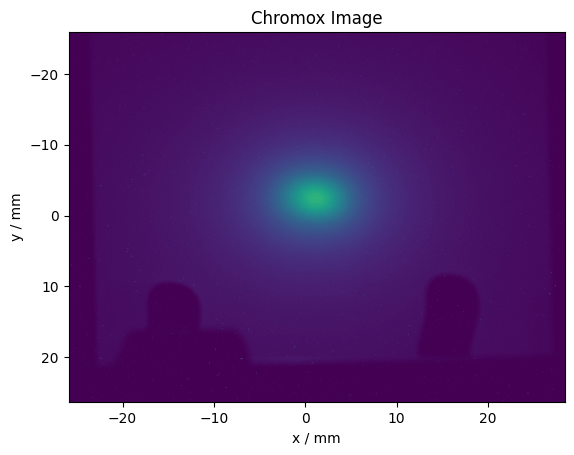

In [295]:
extent = [raw_x[0], raw_x[-1], raw_y[0], raw_y[-1]]
print(extent)

fig, ax = plt.subplots()
im = ax.imshow(raw_im, extent=extent, aspect="auto")
ax.set_xlabel("x / mm")
ax.set_ylabel("y / mm")
ax.set_title("Chromox Image")
plt.show()

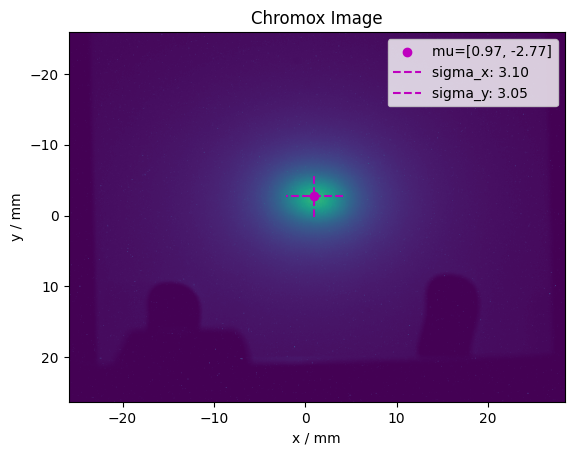

In [296]:
def get_moments(img, pixels_x, pixels_y):
    """Calculates the first and second moments"""

    thresh = 0.2
    max_intensity = np.max(img)
    mu = [0, 0]
    var = [0, 0]

    total_counts = 0
    
    # FIRST MOMENT CALCULATION
    for i in range(img.shape[1]):
        for j in range(img.shape[0]):
            x = pixels_x[i]
            y = -1*pixels_y[j]
            coords = np.array([x, y])

            if img[j, i]>thresh*max_intensity:
                val = img[j, i]
            else: 
                val = 0
            
            weighted_coord = np.multiply(val, coords)
            mu += weighted_coord
            total_counts+=val

    mu = np.multiply(mu, 1/total_counts)

    total_counts = 0
    #SECOND MOMENT CALCULATION
    for i in range(img.shape[1]):
        for j in range(img.shape[0]):
            x = pixels_x[i]
            y = -1*pixels_y[j]
            coords = [x, y]

            if img[j, i]>thresh*max_intensity:
                val = img[j, i]
            else:
                val = 0
            
            squared_displacement = np.pow(np.subtract(mu, coords),2)
            var += np.multiply(squared_displacement, val)
            total_counts += val

    var = np.multiply(var, 1/total_counts)
    sigma = np.pow(var, 0.5)


    return mu, sigma


mu, sigma = get_moments(raw_im, pixels_x=raw_x, pixels_y=raw_y)

y0 = mu + [0, sigma[1]]
y1 = mu - [0, sigma[1]]
x0 = mu + [sigma[0], 0]
x1 = mu - [sigma[0], 0]

fig, ax = plt.subplots()
im = ax.imshow(raw_im, extent=extent, aspect="auto")
ax.set_xlabel("x / mm")
ax.set_ylabel("y / mm")
ax.set_title("Chromox Image")
ax.scatter(mu[0], mu[1], label=f'mu=[{mu[0]:.2f}, {mu[1]:.2f}]', color='m')

ax.plot([x0[0], x1[0]], [x0[1], x1[1]], color='m', linestyle='--', label=f'sigma_x: {sigma[0]:.2f}')
ax.plot([y0[0], y1[0]], [y0[1], y1[1]], color='m', linestyle='--', label=f'sigma_y: {sigma[1]:.2f}')

plt.legend()
plt.show()
